In [2]:
%matplotlib widget
# %matplotlib qt
import matplotlib.pyplot as plt
import numpy as np
import bmcs_utils.api as bu
from bmcs_cross_section.api import MKappa, TShape, EC2, BarLayer, ReinfLayer
from bmcs_beam.api import SLSParamStudy, BoundaryConditions, BoundaryConfig, DeflectionProfile, BeamDesign, BeamSLSCurve, LoadDeflectionParamsStudy
from mpl_toolkits import mplot3d


$q_{GZT}$ = F_u in the code\
$q_{GZG}$ = F_s in the code\
$\gamma_{carbon}$ 1.3/(0.85*0.9)

In [ ]:
fig, ax = plt.subplots()
b_sls.plot_with_ec2_curves(b_sls.F_u_grid, b_sls.F_s_grid, b_sls.rho_grid, b_sls.sl_grid, ax)
fig
fig.savefig('biegeversuche_properties_300_100_section_4pb.pdf')

In [23]:
b_sls = BeamSLSCurve(f_ck=40, use_f_ctm_fl=False, rein_type = 'carbon_grid', system_type = 'dist', n_i=10)
ps = SLSParamStudy(b_sls)
b_sls.interact()

dp updated!
dp updated!
dp updated!


start thread
run started...
parameter combination 0.0002 3.0
start thread
run started...
parameter combination 0.0002 3.0


$$\frac{F_\mathrm{limit}}{F_\mathrm{SLS}} = 1$$

$$\frac{F_\mathrm{limit}}{\zeta F_\mathrm{ULS}} = 1$$

$$\frac{\zeta F_\mathrm{ULS}}{F_\mathrm{limit}}= 1$$

$$\frac{F_\mathrm{ULS}}{F_\mathrm{limit}}= \frac{1}{\zeta}$$

In [43]:
zeta = b_sls.sls_to_uls_ratio
F_ULS = b_sls.F_u_grid / 1.5 # F_Ed_u
F_SLS = zeta * F_ULS # F_Ek_qs
F_limit = b_sls.F_s_grid # F_C
rho = b_sls.rho_grid
sl = b_sls.sl_grid

z1 = F_ULS / F_limit - 1. / zeta
# util_levels = np.array([1, 0.8, 0.6, 0.4])

z2 = F_limit / F_SLS

F_limit[-1, -1], F_SLS[-1, -1]

(96.13902020129161, 209.3220547939415)

-0.6049388573380079 7.0


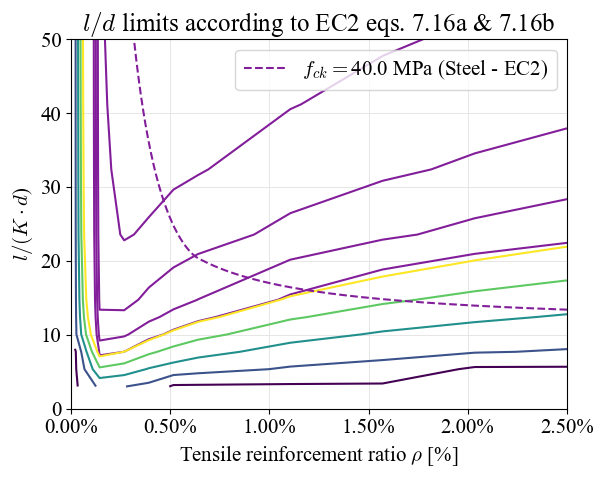

In [44]:
fig, ax = plt.subplots()

color = np.random.rand(3, )

# cs = ax.contour(rho, sl, z1, levels=[0], colors=[color])
cs = ax.contour(rho, sl, z2, levels=[0.2, 0.4, 0.6, 0.8, 1], colors=[color])
cs = ax.contour(rho, sl, 1/z2, levels=[0.2, 0.4, 0.6, 0.8, 1])

# cs = ax.contour(rho, sl, z2, levels=1 - util_levels, colors=[color])

# cs = ax.contour(rho, sl, z)
# cs.collections[0].set_label(label)

# Put values on lines
# ax.clabel(cs, inline=True, fontsize=10)

# p = cs.collections[0].get_paths()[0]
# v = p.vertices
# b_sls.rho = v[:, 0]
# b_sls.sl = v[:, 1]

# Draw EC2 curve
b_sls.plot_steel_sls_curves(ax, f_cks=[b_sls.f_ck],
                           axes_start_from_zero=True,
                           color=color)
print(np.min(z), np.max(z))
fig

$$
\eta^\mathrm{FRP} = \frac{F^\mathrm{FRP}_\mathrm{C}}{F^\mathrm{FRP}_\mathrm{Ek,qp}}
$$

$$
\eta^\mathrm{steel} = \frac{F^\mathrm{steel}_\mathrm{C}}{F^\mathrm{steel}_\mathrm{Ek,qp}}
$$

$$
\eta = \frac{F^\mathrm{FRP}_\mathrm{C}}{F^\mathrm{steel}_\mathrm{C}}
$$

In [ ]:
# b_sls = BeamSLSCurve()
# ps = SLSParamStudy(b_sls)

In [ ]:
# b_sls.interact()

In [ ]:
b_sls.n_i = 30

In [ ]:
b_sls.rein_type = 'carbon_grid'
b_sls.dense_quarter = True

In [ ]:
# fig, ax = plt.subplots()
# ax.vlines(b_sls.rho_range, ymin=0, ymax=50)
# ax.hlines(b_sls.slenderness_range, xmin=0, xmax=0.025)

In [ ]:
b_sls.concrete_law = 'EC2 with plateau'

In [ ]:
EC2.get_f_ctm_fl(b_sls.f_ck, 300)

In [ ]:
b_sls.apply_material_factors = True
b_sls.use_f_ctm_fl = False
b_sls.concrete_law = 'EC2'

In [ ]:
b_sls.f_ck=40
dp = b_sls.dp
dp.mc.cross_section_shape = 'I-shape'
dp.mc.cross_section_shape_.H = 300
dp.mc.cross_section_shape_.B_w = 100
dp.mc.cross_section_shape_.B_f_bot = 100
dp.mc.cross_section_shape_.B_f_top = 400
dp.mc.cross_section_shape_.H_f_bot = 100
dp.mc.cross_section_shape_.H_f_top = 100

In [ ]:
params_config = [
#     ['f_ctm', b_sls, [1* EC2.get_f_ctm_fl(b_sls.f_ck, 300), 2* EC2.get_f_ctm_fl(b_sls.f_ck, 300)]],
#     [['f_ck', b_sls, [30, 50, 70]], ['f_ctm', b_sls, [7.5, 10.58, 12]]],
#         [['f_ck', b_sls, [10]], ['f_ctm', b_sls, [4]]],
#     ['f_ck', b_sls, [50, 100]],
#     ['sls_to_uls_ratio', b_sls, [0.59, 0.51]]
#     ['concrete_law', b_sls, ['EC2 with plateau', 'EC2']],
    ['n_i', b_sls, [30]],
#     ['dense_quarter', b_sls, [True, False]],
#     ['use_f_ctm_fl', b_sls, [True, False]],
#     ['apply_material_factors', b_sls, [True, False]],
#     ['rein_type', b_sls, ['carbon_grid', 'carbon_rebars']],
#     ['H', b_sls.dp.mc.cross_section_shape_, [200, 400, 600]],
#     ['B', b_sls.dp.mc.cross_section_shape_, [1000, 200]],
#     [['B', b_sls.dp.mc.cross_section_shape_, [1000, 200, 300]], ['H', b_sls.dp.mc.cross_section_shape_, [300, 400, 700]]],
    [['f_t', b_sls.dp.mc.cross_section_layout.items[0].matmod_, [1000]], ['E', b_sls.dp.mc.cross_section_layout.items[0].matmod_, [100000]]],
    ]
fig = ps.run(params_config, savefig=True)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
b_sls.dp.plot_fw_with_fmax(ax)
# fig.savefig('carbon_sl_10_rho_0.28.pdf')
fig

In [ ]:
# sls.plot_F_u()
sls.plot_F_u(bending_shear_diff = True)
# sls.plot_F_u(load='shear')


# Achse x: Bewehrungsgrad rho [%]
# Achse y: Biegeschlankheit l/d [-]

## Tensile vs compression failure zones

In [ ]:
dp = b_sls.dp
mc = dp.mc
# for rho in b_sls.rho_range:
#     area_g = mc.cross_section_shape_.get_cs_area()
#     A_j_g = rho * area_g
#     mc.cross_section_layout.items[0].A = A_j_g
#     mc.M_t / mc.M_scale

In [ ]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(b_sls.rho_grid, b_sls.sl_grid, b_sls.F_u_grid,
                       linewidth=0, antialiased=False, cmap=cm.coolwarm)

In [ ]:
np.linspace(0, 5000, 30)
fig, ax = plt.subplots()
# z = b_sls.F_u_grid / b_sls.F_s_grid - 1. / b_sls.sls_to_uls_ratio
z = b_sls.F_u_grid
cs = ax.contour(b_sls.rho_grid, b_sls.sl_grid, z, levels=[0, 10, 20, 50, 80, 100, 150, 300, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
ax.clabel(cs, inline=True, fontsize=10)

### 1. EC2 - Steel

In [ ]:
b_sls.n_i = 10
b_sls.rein_type = 'steel'
b_sls.dense_quarter = False

### 2. EC2 - Carbon

In [ ]:
b_sls.n_i = 10
b_sls.rein_type = 'carbon_grid'
b_sls.dense_quarter = True